In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [332]:
train= pd.read_csv("C://Users//hp//Desktop//ml udemy//DATA//train_loan.csv")

In [333]:
test= pd.read_csv("C://Users//hp//Desktop//ml udemy//DATA//test_loan.csv")

In [334]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [335]:
train_original=train.copy()
test_original=test.copy()

In [336]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [337]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [338]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [339]:
train.shape,test.shape

((614, 13), (367, 12))

In [340]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [341]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

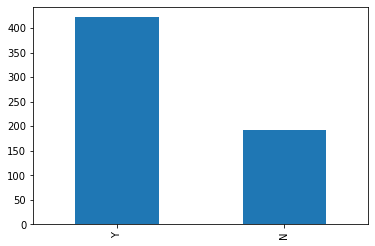

In [342]:
train['Loan_Status'].value_counts().plot.bar()

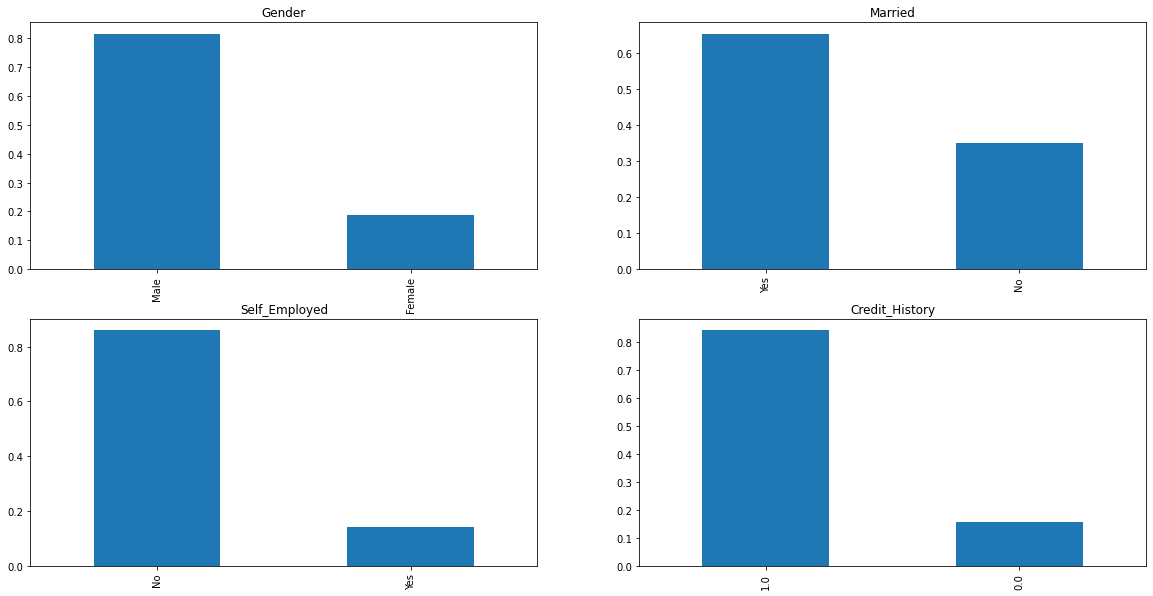

In [343]:
#visualization of categorical variables
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')
plt.show()

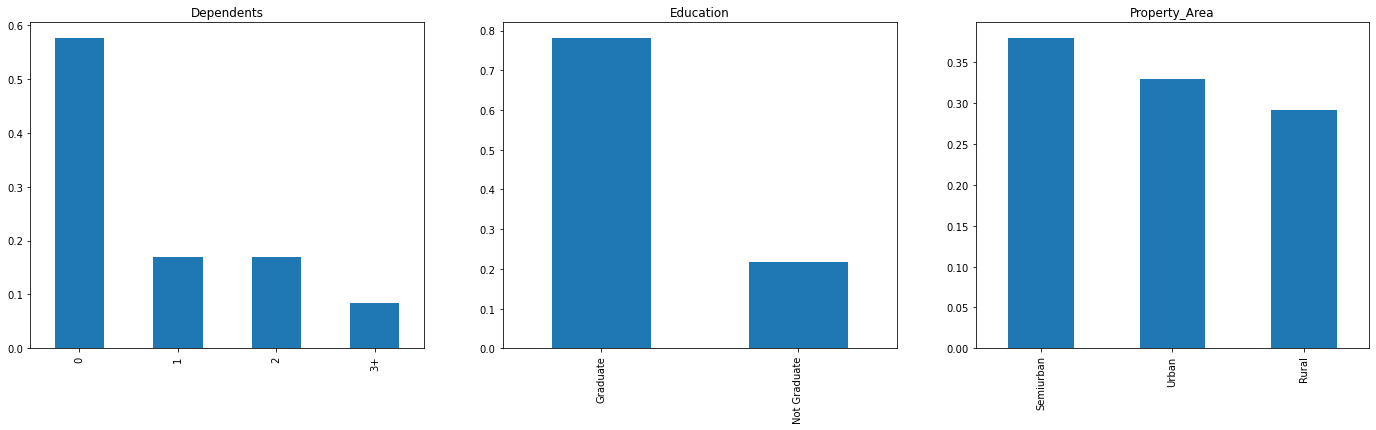

In [344]:
#visualization of ordinal variables
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property_Area')

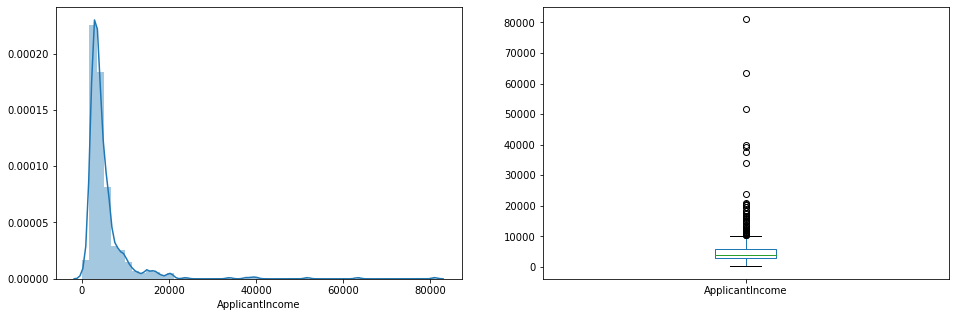

In [345]:
#visualizing numerical variables
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, ' ')

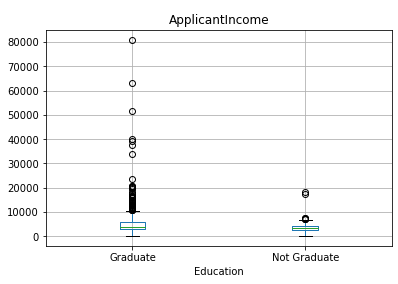

In [346]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle(" ")


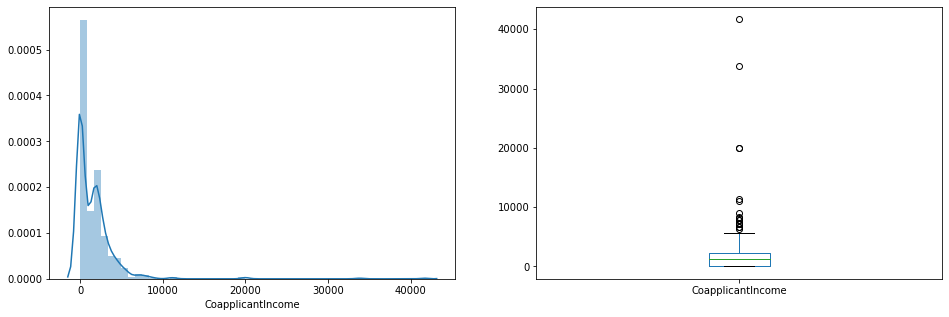

In [347]:
#visualizing numerical variables
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

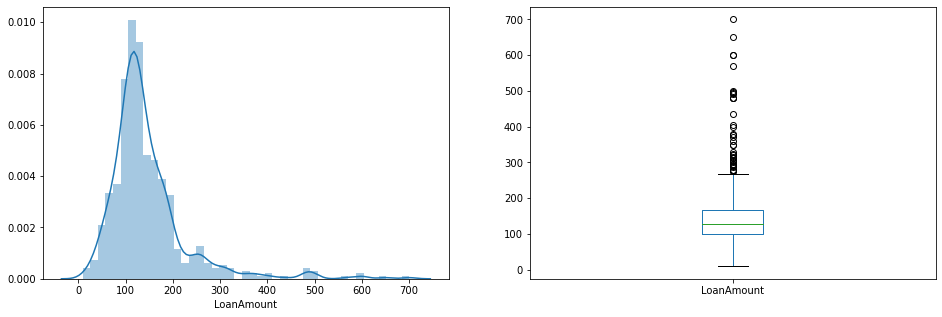

In [348]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

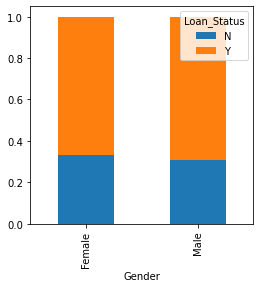

In [349]:
#bivariate analysis(categorical variable vs target variable)
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

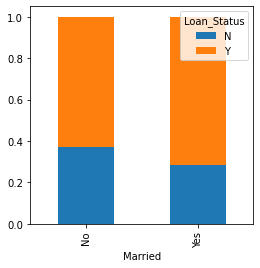

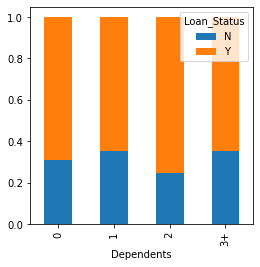

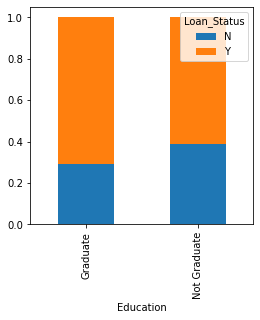

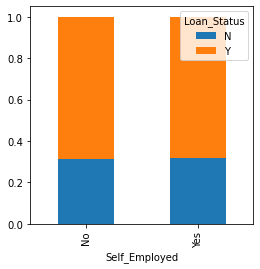

In [350]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

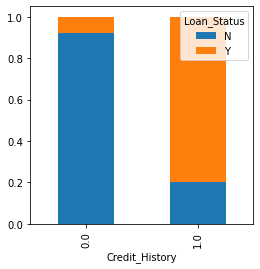

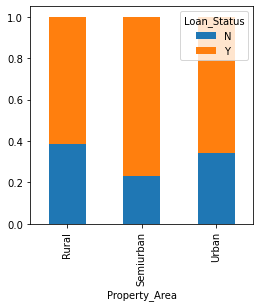

In [351]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

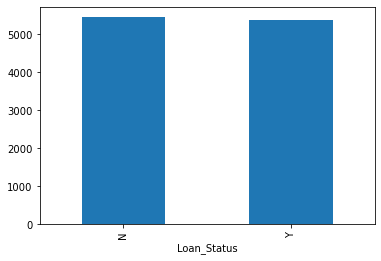

In [352]:
#numerical independent variable vs target variable\
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [353]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Text(0, 0.5, 'Percentage')

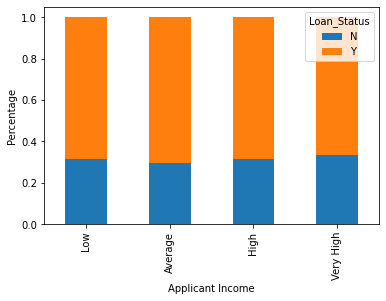

In [354]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

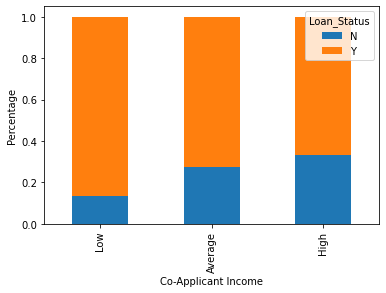

In [355]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Co-Applicant Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

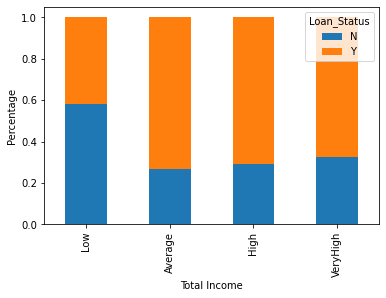

In [356]:
train['totalincome']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
groups=['Low','Average','High','VeryHigh']
train['Total_Income_bin']=pd.cut(train['totalincome'],bins,labels=groups)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

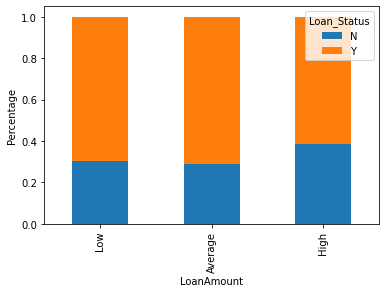

In [357]:
bins=[0,100,200,700]
groups=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=groups)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [358]:
train=train.drop(['Income_bin','Coapplicant_Income_bin','Total_Income_bin','LoanAmount_bin'],axis=1)

In [359]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)


In [360]:
train['Loan_Status'].replace("N",0,inplace=True)
train['Loan_Status'].replace("Y",1,inplace=True)


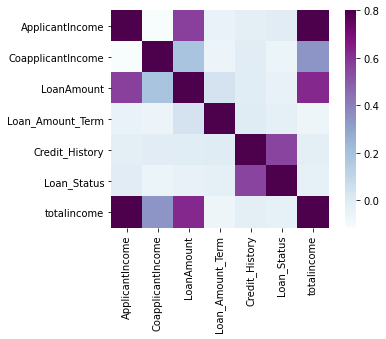

In [361]:
sns.heatmap(train.corr(),vmax=0.8,square=True,cmap='BuPu')

In [362]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
totalincome           0
dtype: int64

In [363]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [364]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [365]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
totalincome          0
dtype: int64

In [366]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [367]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [368]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

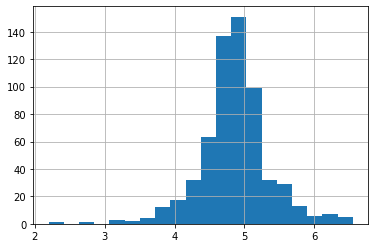

In [369]:
train['Loan_Amount_log']=np.log(train['LoanAmount'])
train['Loan_Amount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [370]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [371]:
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']
X=X.drop('totalincome',axis=1)


In [372]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [373]:
from sklearn.model_selection import train_test_split

In [374]:
 X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [375]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [376]:
model=LogisticRegression()

In [377]:
model.fit(X_train,y_train)

LogisticRegression()

In [378]:
LogisticRegression(C=1,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=1000,multi_class='ovr',
                   n_jobs=1,penalty='l2',random_state=1,solver='liblinear',tol=.0001,verbose=0,warm_start=False)

LogisticRegression(C=1, max_iter=1000, multi_class='ovr', n_jobs=1,
                   random_state=1, solver='liblinear')

In [379]:
pred=model.predict(X_valid)
accuracy_score(y_valid,pred)

0.7675675675675676

In [380]:
pred_test=model.predict(test)

In [381]:
submission=pd.read_csv('C://Users//hp//Desktop//ml udemy//DATA//sample_submission_loan.csv')
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [382]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [383]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')